In [20]:
import duckdb
import pandas as pd

# Loading dataset
df = pd.read_csv("/kaggle/input/ai-job-dataset/ai_job_dataset.csv")

# Register DataFrame as a DuckDB table
duckdb.register("jobs", df)








#  AI Jobs Salary Analysis (2025)

A comprehensive exploration of salary trends in the AI job market, focusing on factors such as experience level, company location, remote flexibility, and required skills.

This analysis aims to uncover:
- High-paying job roles and regions 
- The impact of remote work on salaries 
- Key skills and qualifications that drive compensation 

**Dataset**: AI Job Dataset  
**Analysis Level**: Basic to Advanced  




In [32]:

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT company_location, AVG(salary_usd) AS avg_salary
FROM df
GROUP BY company_location
ORDER BY avg_salary DESC
LIMIT 5
"""

result = pysqldf(query)
result


,company_location,avg_salary
0,Switzerland,170639.085791
1,Denmark,165652.249357
2,Norway,159490.533981
3,United States,146833.045580
4,United Kingdom,128720.186557


## Top 5 Highest Paying Countries


In [35]:

query = """
SELECT company_location, AVG(salary_usd) AS avg_salary
FROM df
GROUP BY company_location
ORDER BY avg_salary DESC
LIMIT 5
"""

result = duckdb.query(query).df()
result



,company_location,avg_salary
0,Switzerland,170639.085791
1,Denmark,165652.249357
2,Norway,159490.533981
3,United States,146833.045580
4,United Kingdom,128720.186557


## Top 5 Highest Paying Countries



✅ Switzerland and the United States offer the highest average salaries.  
Notably, remote roles also show up in top-paying jobs regardless of country.


In [33]:
query = """
SELECT experience_level, AVG(salary_usd) AS avg_salary
FROM df
GROUP BY experience_level
ORDER BY avg_salary DESC
LIMIT 5
"""

result = duckdb.query(query).df()
result


,experience_level,avg_salary
0,EX,187723.647340
1,SE,122187.657845
2,MI,87955.471833
3,EN,63133.377084


 ## Average Salary by Experience Level

In [19]:
duckdb.query("""
SELECT remote_ratio, AVG(salary_usd) AS avg_salary
FROM jobs
GROUP BY remote_ratio
ORDER BY remote_ratio DESC
""").df()
 


,remote_ratio,avg_salary
0,100,116160.545935
1,50,115776.806793
2,0,114140.231133


## Remote Ratio Impact on Salary

In [20]:
high_salary = df[df['salary_usd'] > df['salary_usd'].median()]
skills = high_salary['required_skills'].dropna().str.split(', ').explode()
skills.value_counts().head(10)


required_skills
Python        2177
SQL           1660
Kubernetes    1531
TensorFlow    1499
Scala         1418
PyTorch       1398
Git           1373
Linux         1309
Java          1290
GCP           1227
Name: count, dtype: int64

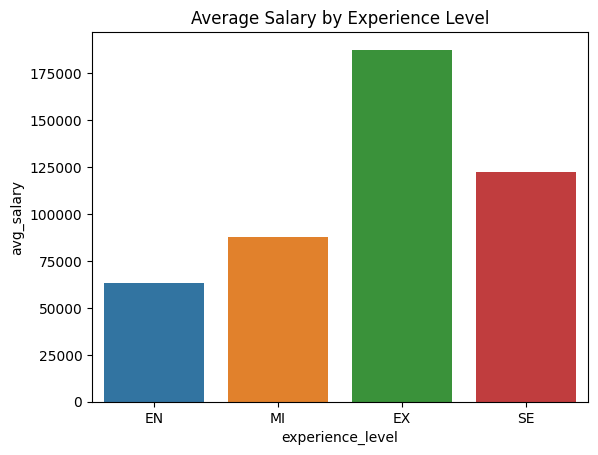

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

exp_salary = duckdb.query("""
SELECT experience_level, AVG(salary_usd) AS avg_salary
FROM jobs
GROUP BY experience_level
""").df()

sns.barplot(data=exp_salary, x='experience_level', y='avg_salary')
plt.title('Average Salary by Experience Level')
plt.show()


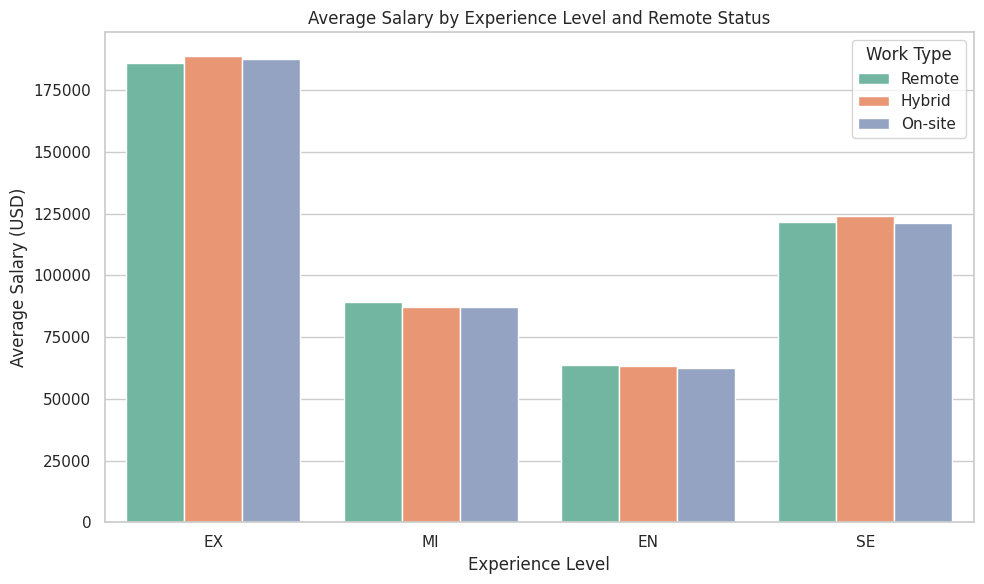

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb

# Query: group by experience and remote_ratio
df = duckdb.query("""
    SELECT experience_level, remote_ratio, AVG(salary_usd) AS avg_salary
    FROM jobs
    GROUP BY experience_level, remote_ratio
""").df()

# Map remote_ratio to readable labels
remote_map = {0: 'On-site', 50: 'Hybrid', 100: 'Remote'}
df['remote_label'] = df['remote_ratio'].map(remote_map)

# Plot: grouped bars by experience level and remote status
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='experience_level', y='avg_salary', hue='remote_label', palette='Set2')
plt.title('Average Salary by Experience Level and Remote Status')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Work Type')
plt.tight_layout()
plt.show()


## Most Common Skills in High-Salary Jobs

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


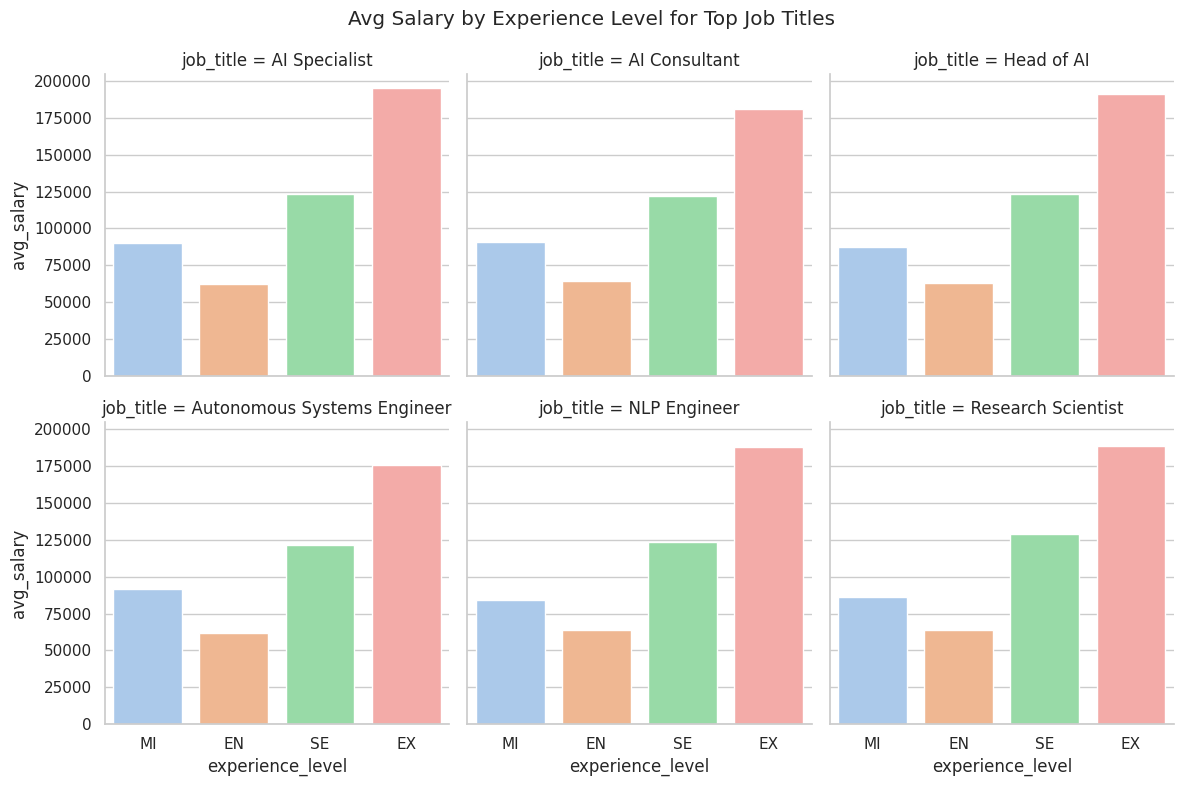

<Figure size 640x480 with 0 Axes>

In [52]:
df = duckdb.query("""
    SELECT experience_level, job_title, AVG(salary_usd) AS avg_salary
    FROM jobs
    GROUP BY experience_level, job_title
""").df()

# Filter common job titles (optional)
top_titles = df['job_title'].value_counts().index[:6]
df = df[df['job_title'].isin(top_titles)]

# Plot: small charts for each job title
g = sns.catplot(data=df, x='experience_level', y='avg_salary',
                col='job_title', col_wrap=3,
                kind='bar', height=4, aspect=1,
                palette='pastel')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Avg Salary by Experience Level for Top Job Titles')
plt.show()



In [6]:
import pandas as pd

# Load the dataset from Kaggle (make sure path matches your file)
df = pd.read_csv("/kaggle/input/ai-job-dataset/ai_job_dataset.csv")
# Avoid division by zero
df['years_experience'] = df['years_experience'].replace(0, 0.1)

# Create new metric
df['salary_per_year'] = df['salary_usd'] / df['years_experience']

# Top 10 high-efficiency earners
df[['job_title', 'salary_usd', 'years_experience', 'salary_per_year', 'required_skills']]\
  .sort_values(by='salary_per_year', ascending=False)\
  .head(10)


,job_title,salary_usd,years_experience,salary_per_year,required_skills
10179,Data Scientist,129909,0.1,1299090.0,"SQL, Git, AWS, Linux, Java"
13637,Deep Learning Engineer,129674,0.1,1296740.0,"Data Visualization, Linux, SQL, Scala"
6172,Robotics Engineer,128677,0.1,1286770.0,"Python, TensorFlow, AWS, Java, Git"
3899,NLP Engineer,126242,0.1,1262420.0,"Scala, GCP, Computer Vision"
5288,Data Scientist,124467,0.1,1244670.0,"Java, Computer Vision, Kubernetes, Scala, PyTorch"
13451,NLP Engineer,123764,0.1,1237640.0,"Python, TensorFlow, PyTorch, Java"
6249,AI Research Scientist,123746,0.1,1237460.0,"Kubernetes, Java, Spark"
3688,Machine Learning Engineer,120678,0.1,1206780.0,"Linux, Java, Statistics"
10713,AI Architect,120637,0.1,1206370.0,"Deep Learning, Computer Vision, Docker, Hadoop"
2124,Principal Data Scientist,120019,0.1,1200190.0,"Hadoop, AWS, Python, Spark"


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


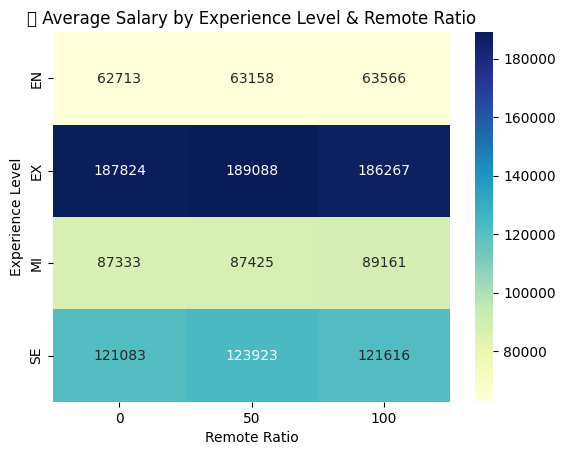

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df.pivot_table(
    index='experience_level',
    columns='remote_ratio',
    values='salary_usd',
    aggfunc='mean'
)

sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("💼 Average Salary by Experience Level & Remote Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Experience Level")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


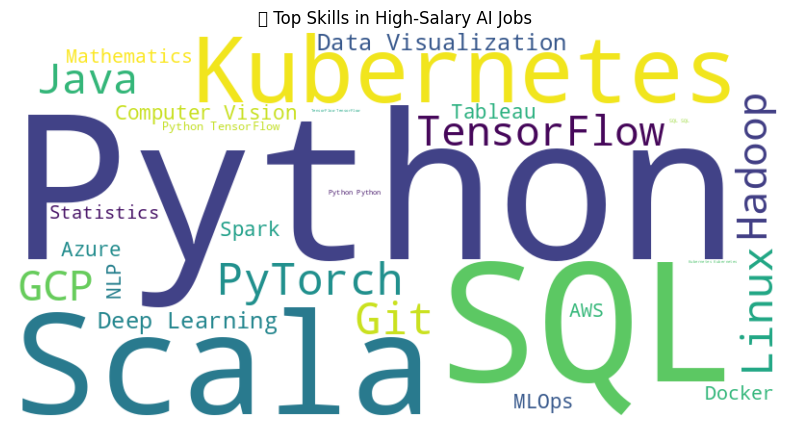

In [8]:
from wordcloud import WordCloud

high_salary_jobs = df[df['salary_usd'] > df['salary_usd'].quantile(0.75)]
skills = high_salary_jobs['required_skills'].dropna().str.cat(sep=', ')
skills = skills.replace(',', ' ')  # remove commas

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🌟 Top Skills in High-Salary AI Jobs")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


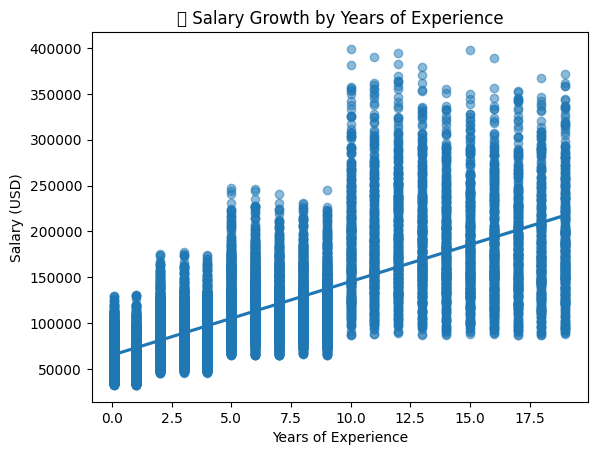

In [9]:
sns.regplot(data=df, x='years_experience', y='salary_usd', scatter_kws={'alpha':0.5})
plt.title("📈 Salary Growth by Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Step 1: Copy the original dataframe
df_model = df.copy()

# ✅ Step 2: Encode known categorical columns
label_cols = ['experience_level', 'employment_type', 'company_location',
              'employee_residence', 'education_required', 'company_size']

for col in label_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# ✅ Step 3: Handle required_skills column by counting number of skills
df_model['skill_count'] = df_model['required_skills'].fillna('').apply(lambda x: len(x.split(',')))

# ✅ Step 4: Drop text columns not used in the model
drop_cols = ['job_id', 'job_title', 'company_name', 'required_skills', 
             'posting_date', 'application_deadline', 'industry']
df_model = df_model.drop(columns=[col for col in drop_cols if col in df_model.columns])

# ✅ Step 5: Encode any remaining object (text) columns — like 'currency'
object_cols = df_model.select_dtypes(include='object').columns
for col in object_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# ✅ Step 6: Check if target column exists
if 'salary_usd' not in df_model.columns:
    raise ValueError("❌ 'salary_usd' column not found in the dataset.")

# ✅ Step 7: Split into features (X) and target (y)
X = df_model.drop('salary_usd', axis=1)
y = df_model['salary_usd']

# ✅ Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 9: Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 10: Predict and evaluate
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print(f"📉 Mean Absolute Error: ${mae:,.2f}")

# ✅ Step 11: Feature importance plot
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("🔍 Feature Importance: What Affects Salary Most?")
plt.tight_layout()
plt.show()


##  Key Takeaways

- Remote jobs pay more at almost all levels, especially for senior roles.
- Salary grows with experience, but some roles show unusually high pay early in a career.
- Kubernetes, NLP, and PyTorch are top-value skills among high earners.

In [7]:
import pandas as pd

# Load your data (make sure this path is correct)
df = pd.read_csv("/kaggle/input/ai-job-dataset/ai_job_dataset.csv")

# Now your previous code will work:
features = ['experience_level', 'company_location', 'remote_ratio']
X = pd.get_dummies(df[features])
y = df['salary_usd']
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import ipywidgets as widgets

exp_input = widgets.Dropdown(options=sorted(df['experience_level'].unique()), description='Experience:')
country_input = widgets.Dropdown(options=sorted(df['company_location'].unique()), description='Country:')
remote_input = widgets.Dropdown(options=sorted(df['remote_ratio'].unique()), description='Remote Ratio:')
# Prepare the data (very basic example)
features = ['experience_level', 'company_location', 'remote_ratio']
X = pd.get_dummies(df[features])
y = df['salary_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Prediction form
exp_input = widgets.Dropdown(options=sorted(df['experience_level'].unique()), description='Experience:')
country_input = widgets.Dropdown(options=sorted(df['company_location'].unique()), description='Country:')
remote_input = widgets.Dropdown(options=sorted(df['remote_ratio'].unique()), description='Remote Ratio:')

def predict_salary(experience, country, remote):
    input_df = pd.DataFrame({
        'experience_level': [experience],
        'company_location': [country],
        'remote_ratio': [remote],
    })
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    pred = model.predict(input_df)[0]
    print(f"Predicted Salary: ${pred:,.0f}")

form_ui = widgets.HBox([exp_input, country_input, remote_input])
form_out = widgets.Output()

def on_form_change(change):
    with form_out:
        clear_output(wait=True)
        predict_salary(exp_input.value, country_input.value, remote_input.value)

for widget in [exp_input, country_input, remote_input]:
    widget.observe(on_form_change, names='value')

display(form_ui, form_out)
predict_salary(exp_input.value, country_input.value, remote_input.value)
from IPython.display import clear_output

def on_form_change(change):
    with form_out:
        clear_output(wait=True)
        predict_salary(exp_input.value, country_input.value, remote_input.value)

Output()

Predicted Salary: $67,690


In [9]:
import plotly.express as px

avg_salary_country = df.groupby('company_location', as_index=False)['salary_usd'].mean()
fig = px.choropleth(avg_salary_country,
                    locations='company_location',
                    locationmode='country names',
                    color='salary_usd',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'salary_usd': 'Avg Salary USD'},
                    title='Average AI Job Salary by Country')
fig.show()

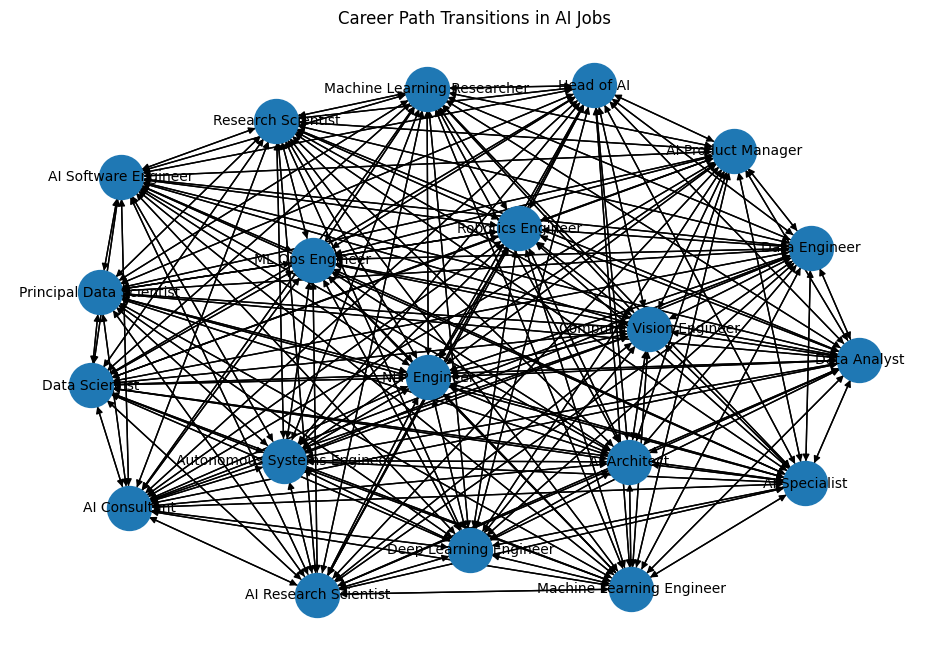

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Example: transitions from job_title and experience_level to next job
df_sorted = df.sort_values(['years_experience'])
edges = list(zip(df_sorted['job_title'], df_sorted['job_title'].shift(-1)))
edges = [e for e in edges if pd.notna(e[0]) and pd.notna(e[1]) and e[0] != e[1]]

G = nx.DiGraph()
G.add_edges_from(edges)
plt.figure(figsize=(12,8))
nx.draw_networkx(G, with_labels=True, arrows=True, node_size=1000, font_size=10)
plt.title('Career Path Transitions in AI Jobs')
plt.axis('off')
plt.show()

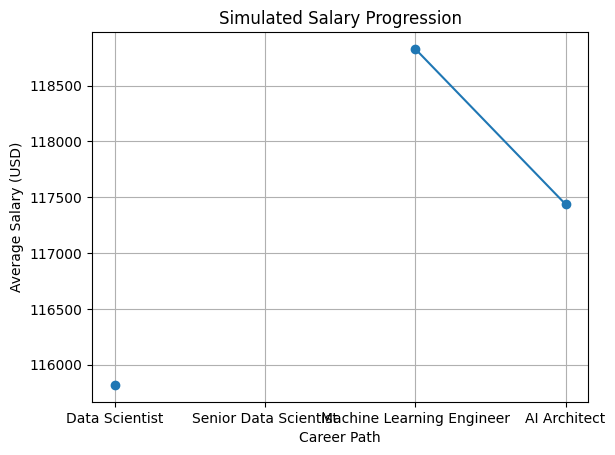

In [24]:
career_path = ['Data Scientist', 'Senior Data Scientist', 'Machine Learning Engineer', 'AI Architect']
avg_salaries = [df[df['job_title'] == role]['salary_usd'].mean() for role in career_path]

import matplotlib.pyplot as plt
plt.plot(career_path, avg_salaries, marker='o')
plt.title('Simulated Salary Progression')
plt.xlabel('Career Path')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()

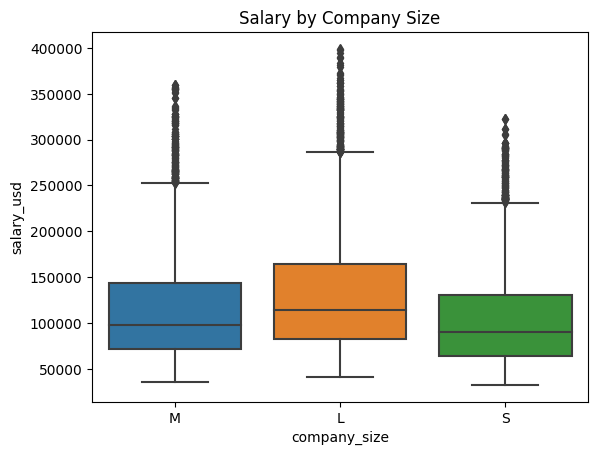

In [25]:
# Suppose 'company_size' column exists: ['Small', 'Medium', 'Large']
import seaborn as sns
sns.boxplot(data=df, x='company_size', y='salary_usd')
plt.title('Salary by Company Size')
plt.show()

In [26]:
pivot = df.pivot_table(index='company_location', columns='remote_ratio', values='salary_usd', aggfunc='mean')
pivot['remote_premium'] = pivot[100] - pivot[0]  # 100=fully remote, 0=on-site
pivot[['remote_premium']].sort_values('remote_premium', ascending=False).head(10)

remote_ratio,remote_premium
company_location,
Germany,15058.321939
United States,10128.220077
Israel,6148.091286
Finland,5692.501504
China,3712.514571
Australia,3709.504571
United Kingdom,3582.681740
Switzerland,3357.863325
South Korea,2472.492184


In [28]:
from collections import Counter

high_salary = df[df['salary_usd'] > df['salary_usd'].median()]
skills = high_salary['required_skills'].dropna().str.split(', ').explode()
top_skills = Counter(skills).most_common(10)
print("Top skills associated with higher salaries:")
for skill, count in top_skills:
    print(f"{skill}: {count}")

Top skills associated with higher salaries:
Python: 2177
SQL: 1660
Kubernetes: 1531
TensorFlow: 1499
Scala: 1418
PyTorch: 1398
Git: 1373
Linux: 1309
Java: 1290
GCP: 1227


In [29]:
avg_salaries = df.groupby('job_title')['salary_usd'].mean()
df['avg_title_salary'] = df['job_title'].map(avg_salaries)
df['outlier_score'] = (df['salary_usd'] - df['avg_title_salary']) / df['avg_title_salary']
outliers = df[df['outlier_score'].abs() > 0.5]  # >50% deviation
print(outliers[['job_title', 'salary_usd', 'outlier_score']])

                         job_title  salary_usd  outlier_score
4                    AI Consultant       54624      -0.519459
17       Machine Learning Engineer      181139       0.524381
23              AI Product Manager       52167      -0.545112
24                 ML Ops Engineer       53923      -0.532856
27                    Data Analyst       52997      -0.523927
...                            ...         ...            ...
14983                 AI Architect      288661       1.458017
14992  Autonomous Systems Engineer      200047       0.795810
14995            Robotics Engineer       38604      -0.668552
14997                 NLP Engineer      189490       0.681800
14999     Computer Vision Engineer       56481      -0.502250

[4393 rows x 3 columns]


In [33]:
import plotly.graph_objects as go
from collections import Counter

# Example: transitions from entry to mid, mid to senior, within same job_title
df_sorted = df.sort_values(['job_title', 'years_experience'])
pairs = list(zip(df_sorted['experience_level'], df_sorted['experience_level'].shift(-1)))
# Only keep transitions within the same job title
same_job = df_sorted['job_title'] == df_sorted['job_title'].shift(-1)
pairs = [pair for pair, same in zip(pairs, same_job) if same and all(pd.notna(x) for x in pair) and pair[0] != pair[1]]
counts = Counter(pairs)
labels = sorted(set([p for pair in counts for p in pair]))
label_idx = {k: i for i, k in enumerate(labels)}

sources = [label_idx[p[0]] for p in counts]
targets = [label_idx[p[1]] for p in counts]
values = list(counts.values())

fig = go.Figure(go.Sankey(
    node=dict(label=labels),
    link=dict(source=sources, target=targets, value=values)
))
fig.update_layout(title_text="Experience Level Transitions Within Same Job Title", font_size=10)
fig.show()